# **Análise e Predição de Custos Médicos com Machine Learning**

Este notebook apresenta um projeto completo de análise e predição de custos médicos com base em características **demográficas, comportamentais e de saúde dos pacientes**. O objetivo é explorar os dados, identificar padrões e desenvolver modelos de aprendizado de máquina para prever o custo médico com precisão.

---
## **Integrantes do Grupo** 👥

- **Bruno Câmara - RM 359922**
- **Fabricio Cavalcante - RM**
- **Leonardo Charelli - RM 360425**
- **Lucas Pincho - RM 360216**
- **Natalia Rosa - RM**

---
## **Estrutura do Notebook**
O notebook está dividido em etapas, desde o carregamento da base de dados até a predição final dos custos. Cada seção conta com explicações claras e gráficos que tornam a análise mais intuitiva.

**Tecnologias utilizadas: Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-Learn.**

Vamos mergulhar nessa análise e descobrir insights valiosos para entender o impacto de diferentes fatores nos custos médicos!
<br><br>

---

## **Objetivos do Projeto**

### 01 - Exploração e Visualização de Dados

*   Análise inicial para entender a distribuição dos dados e detectar possíveis padrões.

*   Visualização gráfica para compreender relações entre variáveis, como idade, região, índice de massa corporal (IMC) e hábitos como fumar.
<br><br>

### 02 - Pré-processamento de Dados


*  Tratamento de dados categóricos para torná-los utilizáveis por algoritmos de machine learning.

*  Normalização das variáveis para garantir melhor desempenho nos modelos.
<br><br>

### 03 - Construção e Avaliação de Modelos


*   Aplicação de diversos algoritmos de regressão para prever os custos médicos.

*   Comparação de desempenho entre os modelos com base em métricas como MAE, MSE e R².
<br><br>

### 04 - Predição do Custo do Plano de Saúde

*   Uso do modelo com melhor desempenho para prever os custos médicos de novos pacientes.

*   Geração de exemplos de predições com diferentes perfis de pacientes, considerando variáveis como idade, BMI, região e hábitos.
<br><br>

### 05 - Interpretação e Conclusões

*   Identificação de fatores que mais impactam nos custos médicos.

*   Escolha do modelo mais adequado para futuras predições.

---

## **Sobre o Dataset**

### **1. Informações Gerais**

- **Nome do Dataset**: US Health Insurance Dataset
- **Origem**: Livro *Machine Learning with R* (Brett Lantz)
- **Data de Publicação**: Outubro de 2013
- **País de Referência**: Estados Unidos
- **Fonte Secundária**: Estatísticas demográficas do U.S Census Bureau
- **Simulado?**: Sim, os dados são simulados e foram criados com base em estatísticas oficiais.
- **Objetivo**: Apoiar o aprendizado em *Machine Learning*, especialmente no desenvolvimento de modelos preditivos para o cálculo de custos de planos de saúde nos Estados Unidos.
<br><br>

### **2. Uso e Aplicações**

Este dataset foi projetado para:

- **Treinamento de Modelos Preditivos de Regressão**: Estimar os custos de planos de saúde com base em características demográficas e comportamentais.
- **Exploração de Dados**: Permitir análises descritivas e construção de gráficos para identificar padrões.
- **Ensino de Machine Learning**: Demonstrar os fundamentos de regressão e aprendizado supervisionado.
<br><br>

### **3. Considerações sobre o Dataset**

1. **Limitações**:
    - **Simulação**: Os dados não refletem informações reais de seguradoras nos EUA, pois são simulados para fins educacionais.
    - **Contexto Temporal**: Os dados foram baseados em estatísticas de 2013, o que pode não representar cenários atuais.
2. **Potenciais Viéses**:
    - A simulação pode apresentar vieses introduzidos pelo autor, como simplificação de variáveis ou distribuições não representativas.

>[Download do dataset](https://drive.google.com/uc?export=download&id=18jXzrIGuyzlHkJ1by-784YPMrxL0HMSD)

>[Link do Livro](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwisv-aLmO6KAxW1X_EDHdXRCbwQFnoECDsQAQ&url=https%3A%2F%2Fwww.researchgate.net%2Fprofile%2FSafial-Ayon%2Fpost%2FCan_you_please_suggest_a_book_hands_on_learning-on_Machine_Learning_using_R_Programming%2Fattachment%2F610f69d82897145fbd6751e5%2FAS%253A1054400541913088%25401628400087902%2Fdownload%2FMachineLearningR__Brett_Lantz.pdf&usg=AOvVaw2HaaaAQ1ZrECPqGkmkacQi&opi=89978449)

>[Link Kaggle 10](https://www.kaggle.com/datasets/simranjain17/insurance/data)

>[Link Kaggle 9.41](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/data)

#Importações

Nesta seção, são carregadas as bibliotecas essenciais para a execução do projeto, abrangendo desde a manipulação e análise de dados até a visualização gráfica e a construção de modelos de machine learning.

As principais ferramentas utilizadas incluem:


*   **Pandas e NumPy**: Para manipulação e análise de dados.
*   **Matplotlib e Seaborn**: Para criação de gráficos e visualizações.
*   **Scikit-learn**: Para pré-processamento dos dados, construção, treinamento e avaliação de modelos preditivos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PowerTransformer, StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Carregamento da Base Dados

Nesta etapa, carregamos o dataset que será utilizado ao longo do projeto. O arquivo CSV contendo os dados foi previamente armazenado na pasta **sample_data** do Google Colab, que é uma localização padrão oferecida pela plataforma. Essa abordagem foi escolhida por sua praticidade, pois o Google Colab já disponibiliza um ambiente configurado para execução de notebooks, facilitando o acesso e o gerenciamento de arquivos.

Caso o arquivo não esteja na pasta, siga as instruções abaixo para realizar o upload da base de dados:

1.   Faça o download da base de dados clicando [aqui](https://drive.google.com/uc?export=download&id=18jXzrIGuyzlHkJ1by-784YPMrxL0HMSD).
2.   Clique no ícone de Arquivos na barra lateral do Colab.
3.   Clique em Enviar arquivo e selecione o arquivo desejado em seu computador.
4.   Copie o caminho do arquivo enviado e substitua a string "/content/sample_data/insurance.csv" pelo caminho correto.

In [ ]:
# Carregando o dataset
df = pd.read_csv("/content/sample_data/insurance.csv")

#Exploração e Visualização dos dados

In [ ]:
# Exibindo as primeiras linhas do dataset
print("\n=== Primeiras Linhas do Dataset ===")
df.head()


=== Primeiras Linhas do Dataset ===


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Visão geral do dataset
print("\n=== Informações sobre o Dataset ===")
df.info()


=== Informações sobre o Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Vericando valores nulos
print("\n=== Valores Nulos ===")
df.isnull().sum()


=== Valores Nulos ===


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
#Vericando valores duplicados
print("\n=== Valores duplicados ===")
df.duplicated(keep=False).sum()


=== Valores duplicados ===


2

In [ ]:
#Removendo valores dupliados
df = df.drop_duplicates(keep='first')

In [ ]:
# Estatísticas descritivas
print("\n=== Estatísticas Descritivas ===")
df.describe()


=== Estatísticas Descritivas ===


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Definindo o estilo de fundo dos gráficos
sns.set_style("whitegrid")

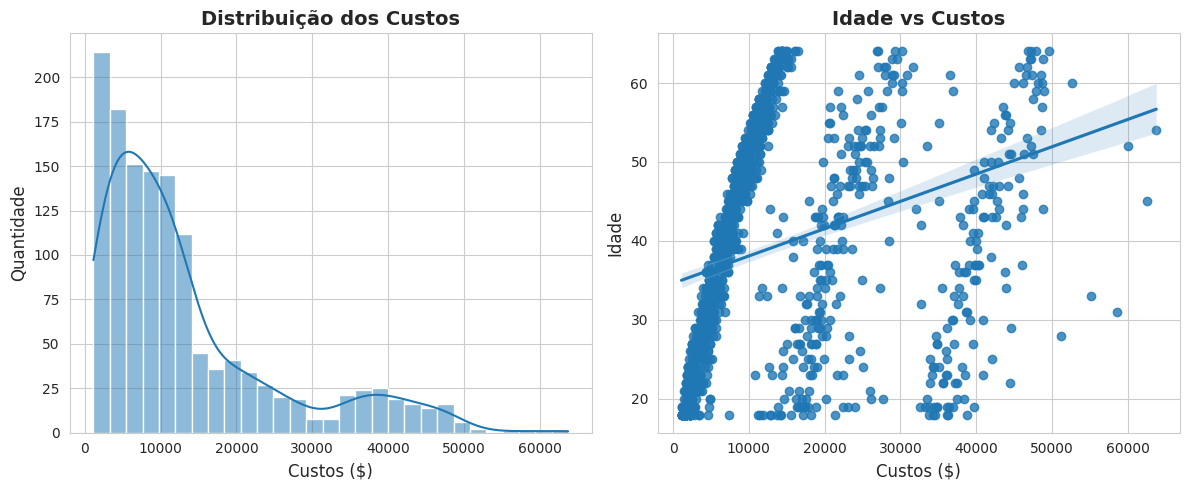

In [ ]:
# Criando uma figura com 1 linha e 2 colunas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primeiro gráfico: Histograma
sns.histplot(df['charges'], kde=True, ax=axs[0])
axs[0].set_title('Distribuição dos Custos', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Custos ($)', fontsize=12)
axs[0].set_ylabel('Quantidade', fontsize=12)

# Segundo gráfico: Dispersão de Idade vs Custos (Com linha de tendência)
sns.regplot(data=df, x='charges', y='age', ax=axs[1])
axs[1].set_title('Idade vs Custos', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Custos ($)', fontsize=12)
axs[1].set_ylabel('Idade', fontsize=12)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

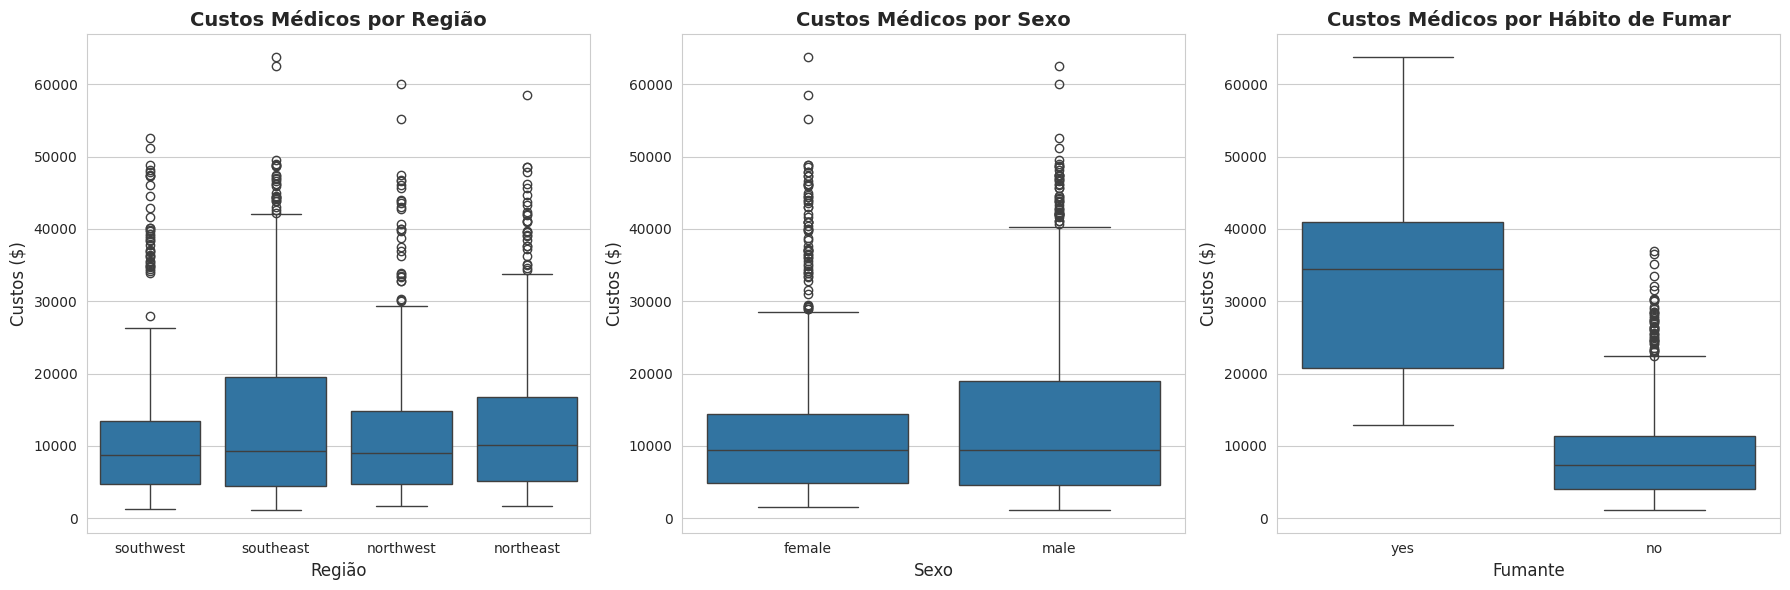

In [ ]:
# Criando uma figura com 1 linha e 3 colunas
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Custos Médicos por Região
sns.boxplot(x='region', y='charges', data=df, ax=axs[0])
axs[0].set_title('Custos Médicos por Região', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Região', fontsize=12)
axs[0].set_ylabel('Custos ($)', fontsize=12)

# Custos Médicos por Sexo
sns.boxplot(x='sex', y='charges', data=df, ax=axs[1])
axs[1].set_title('Custos Médicos por Sexo', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Sexo', fontsize=12)
axs[1].set_ylabel('Custos ($)', fontsize=12)

# Custos Médicos por Hábito de Fumar
sns.boxplot(x='smoker', y='charges', data=df, ax=axs[2])
axs[2].set_title('Custos Médicos por Hábito de Fumar', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Fumante', fontsize=12)
axs[2].set_ylabel('Custos ($)', fontsize=12)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

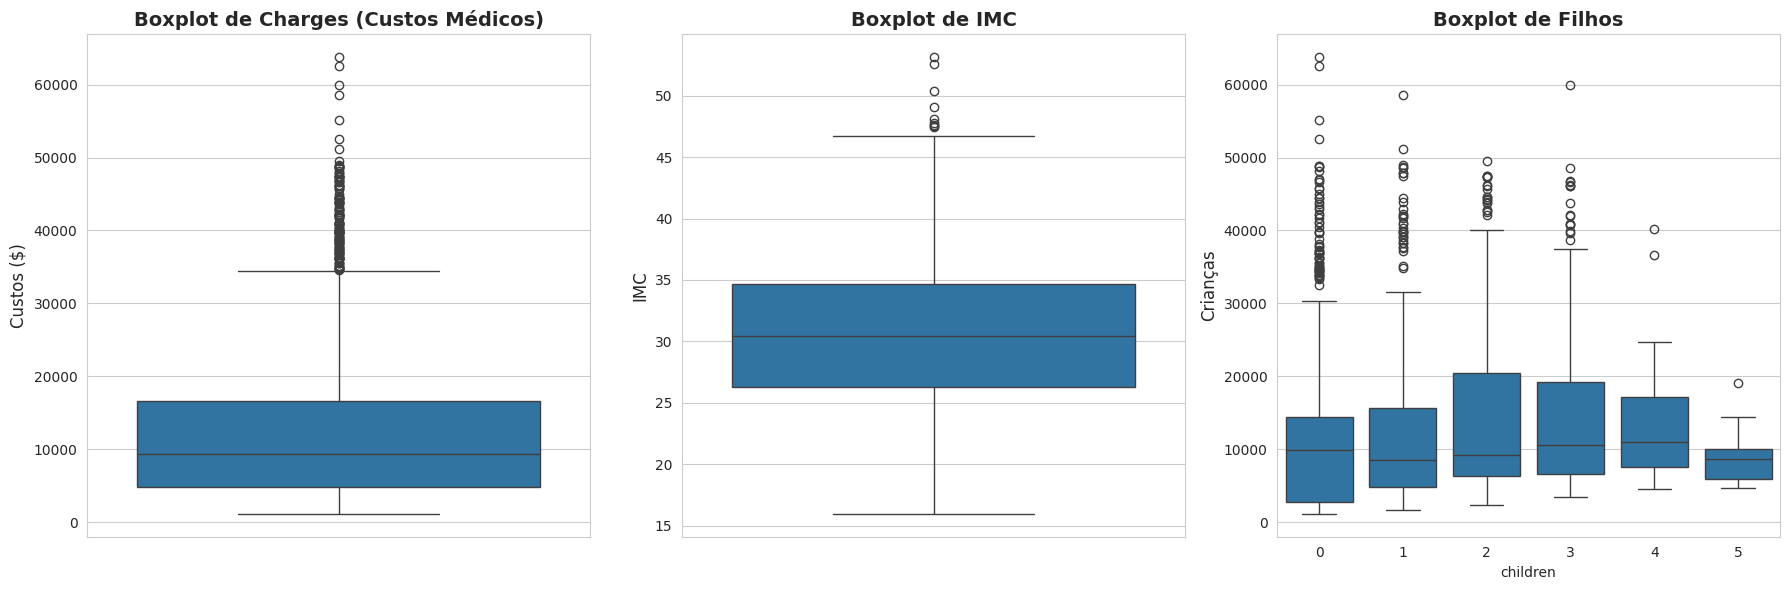

In [ ]:
# Criando uma figura com 1 linha e 3 colunas
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 1. Boxplot para a variável 'charges'
sns.boxplot(data=df, y='charges', ax=axs[0])
axs[0].set_title('Boxplot de Charges (Custos Médicos)', fontsize=14, fontweight='bold')
axs[0].set_ylabel('Custos ($)', fontsize=12)

# 2. Boxplot para a variável 'bmi'
sns.boxplot(data=df, y='bmi', ax=axs[1])
axs[1].set_title('Boxplot de IMC', fontsize=14, fontweight='bold')
axs[1].set_ylabel('IMC', fontsize=12)

# 3. Boxplot para a variável 'children'
sns.boxplot(data=df, x='children', y='charges', ax=axs[2])
axs[2].set_title('Boxplot de Filhos', fontsize=14, fontweight='bold')
axs[2].set_ylabel('Crianças', fontsize=12)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

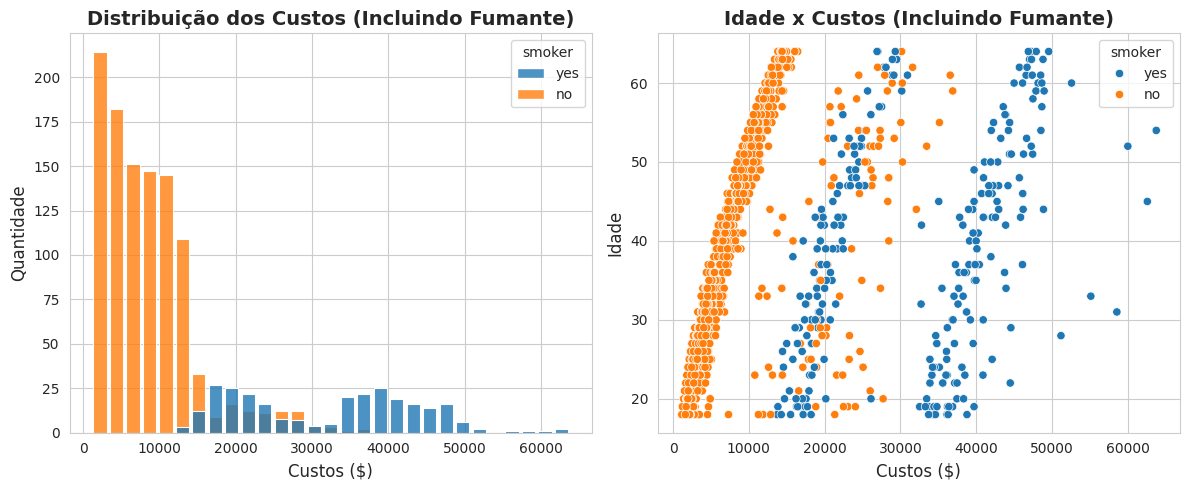

In [ ]:
# Criando uma figura com 1 linha e 2 colunas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primeiro gráfico: Histograma
sns.histplot(data=df, x="charges", hue="smoker", shrink=.8, alpha=.8, ax=axs[0])
axs[0].set_title('Distribuição dos Custos (Incluindo Fumante)', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Custos ($)', fontsize=12)
axs[0].set_ylabel('Quantidade', fontsize=12)

# Segundo gráfico: Dispersão de idade vs custos
sns.scatterplot(data=df, x="charges", y="age", hue="smoker", ax=axs[1])
axs[1].set_title('Idade x Custos (Incluindo Fumante)', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Custos ($)', fontsize=12)
axs[1].set_ylabel('Idade', fontsize=12)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

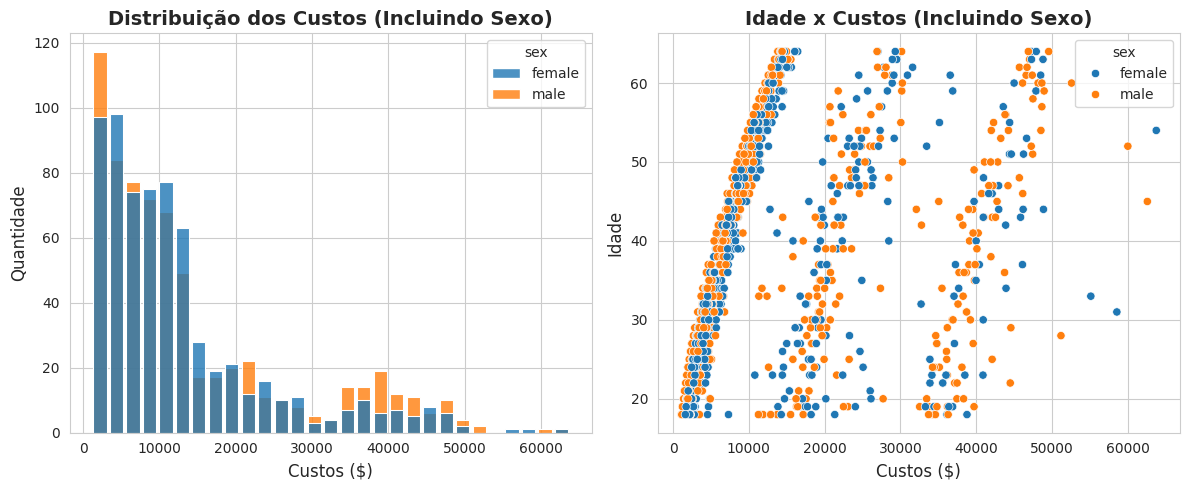

In [ ]:
# Criando uma figura com 1 linha e 2 colunas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primeiro gráfico: Histograma
sns.histplot(data=df, x="charges", hue="sex", shrink=.8, alpha=.8, ax=axs[0])
axs[0].set_title('Distribuição dos Custos (Incluindo Sexo)', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Custos ($)', fontsize=12)
axs[0].set_ylabel('Quantidade', fontsize=12)

# Segundo gráfico: Dispersão de idade vs custos
sns.scatterplot(data=df, x="charges", y="age", hue="sex", ax=axs[1])
axs[1].set_title('Idade x Custos (Incluindo Sexo)', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Custos ($)', fontsize=12)
axs[1].set_ylabel('Idade', fontsize=12)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

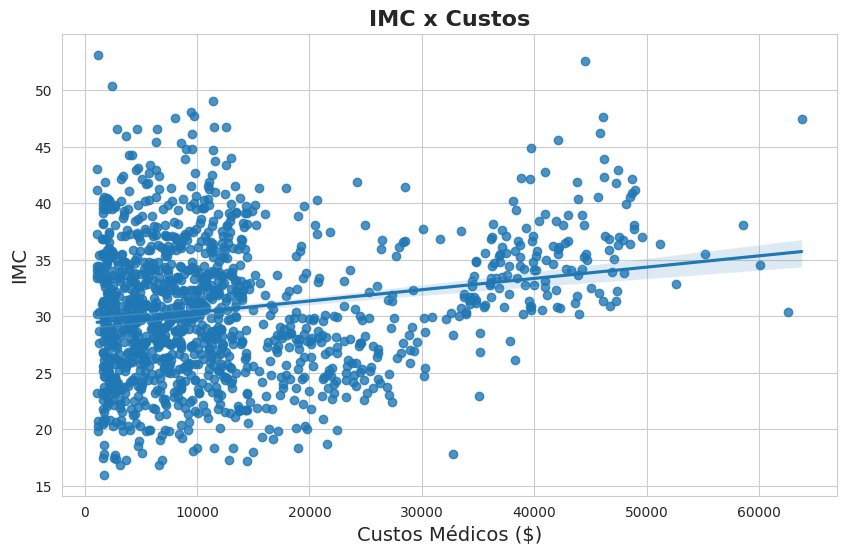

In [ ]:
# Criando um Gráfico de Dispersão (Com linha de tendência)
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='charges', y='bmi')
plt.title('IMC x Custos', fontsize=16, fontweight='bold')
plt.xlabel('Custos Médicos ($)', fontsize=14)
plt.ylabel('IMC', fontsize=14)
plt.show()

#Pré-processamento de Dados

In [ ]:
# Remover outliers em 'charges' acima de 50.000
print("\n=== Removendo Outliers ===")
print(f"Tamanho original do dataset: {len(df)}")

df = df[df['charges'] <= 50000]
print(f"Tamanho após remoção de outliers em 'charges': {len(df)}")


=== Removendo Outliers ===
Tamanho original do dataset: 1337
Tamanho após remoção de outliers em 'charges': 1330


In [ ]:
# Criar uma nova coluna 'bmi_category' com base nos intervalos do IMC
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Abaixo do Peso'
    elif 18.5 <= bmi < 25:
        return 'Peso Normal'
    elif 25 <= bmi < 30:
        return 'Sobrepeso'
    else:
        return 'Obesidade'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

<ipython-input-50-fc70fe30e567>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_category'] = df['bmi'].apply(categorize_bmi)


In [ ]:
# Exibir contagem de categorias
print("Distribuição das categorias de IMC:")
print(df['bmi_category'].value_counts())

Distribuição das categorias de IMC:
bmi_category
Obesidade         699
Sobrepeso         386
Peso Normal       225
Abaixo do Peso     20
Name: count, dtype: int64


In [ ]:
# Codificar variáveis categóricas
df_encoded = df.copy()
label_encoders = {}

for column in ['sex', 'smoker', 'region', 'bmi_category']:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le

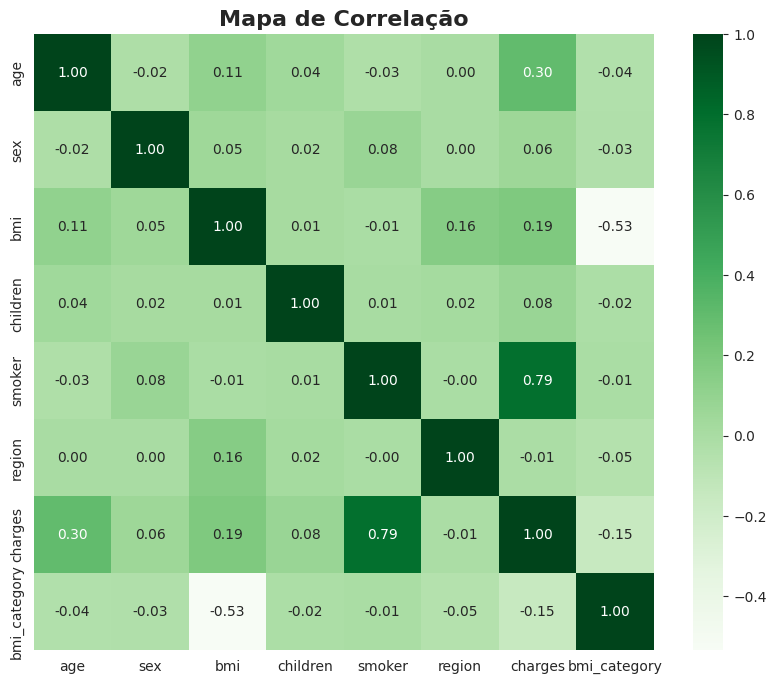

In [ ]:
# Mapa de Correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()  # Utilizando o dataframe codificado
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Greens", cbar=True)
plt.title('Mapa de Correlação', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
# Aplicar PowerTransformer para normalizar variáveis contínuas
pt = PowerTransformer()
df_encoded[['age', 'bmi', 'children']] = pt.fit_transform(df_encoded[['age', 'bmi', 'children']])

In [ ]:
# Separar variáveis independentes (x) e dependente (y)
x = df_encoded.drop('charges', axis=1)
y = np.log1p(df_encoded['charges'])  # Transformação logarítmica para lidar com valores extremos

In [ ]:
# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Mostrar como está a divisão dos dados
print(f"Número de linhas no conjunto de treinamento: {len(x_train)}")
print(f"Número de linhas no conjunto de teste: {len(x_test)}")

Número de linhas no conjunto de treinamento: 1064
Número de linhas no conjunto de teste: 266


In [ ]:
# Escalonar os dados
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Construção e Avaliação de Modelos

In [ ]:
# Inicializar modelos
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "KNeighborsRegressor": KNeighborsRegressor()
}

In [ ]:
# Avaliar modelos
results = {}

for model_name, model in models.items():
    if model_name == "KNeighborsRegressor":
        model.fit(x_train_scaled, y_train)
        predictions = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)

    y_test_exp = np.expm1(y_test)  # Reverter a transformação logarítmica
    y_pred_exp = np.expm1(predictions)  # Reverter a transformação logarítmica
    mae = mean_absolute_error(y_test_exp, y_pred_exp)
    mse = mean_squared_error(y_test_exp, y_pred_exp)
    r2 = r2_score(y_test_exp, y_pred_exp)
    results[model_name] = {"MAE": mae, "MSE": mse, "R²": r2}

# Exibir os resultados
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R²", ascending=False)

,MAE,MSE,R²
KNeighborsRegressor,2333.728554,2.044896e+07,0.854663
RandomForestRegressor,2120.744274,2.097710e+07,0.850909
DecisionTreeRegressor,2797.857499,3.697911e+07,0.737178
LinearRegression,4715.529862,7.874296e+07,0.440349


In [ ]:
# Modelo escolhido (Random Forest)
model_final = RandomForestRegressor(n_estimators=100, random_state=42)
model_final.fit(x_train, y_train)
y_pred_final = model_final.predict(x_test)

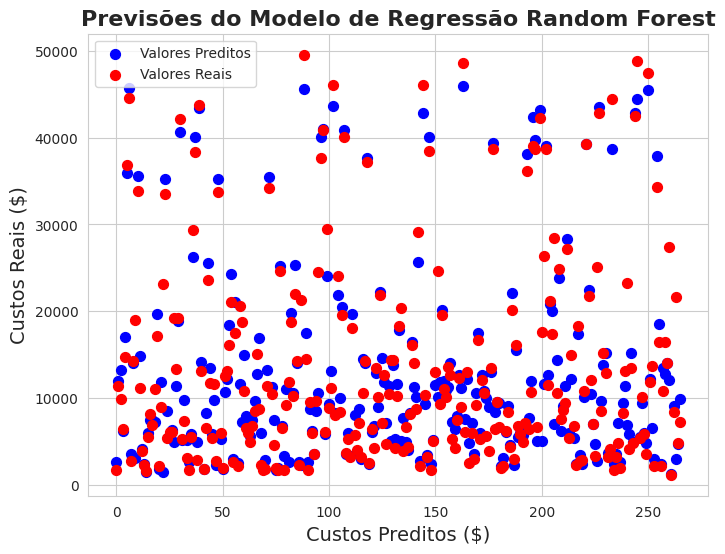

In [ ]:
plt.figure(figsize=(8, 6))

indices = range(len(y_test_exp))

plt.scatter(indices, y_pred_exp, color='blue', label='Valores Preditos', s=50)
#plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], '--', color='red')
plt.scatter(indices, y_test_exp, color='red', label='Valores Reais', s=50)
plt.xlabel('Custos Preditos ($)', fontsize=14)
plt.ylabel('Custos Reais ($)', fontsize=14)
plt.title('Previsões do Modelo de Regressão Random Forest', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

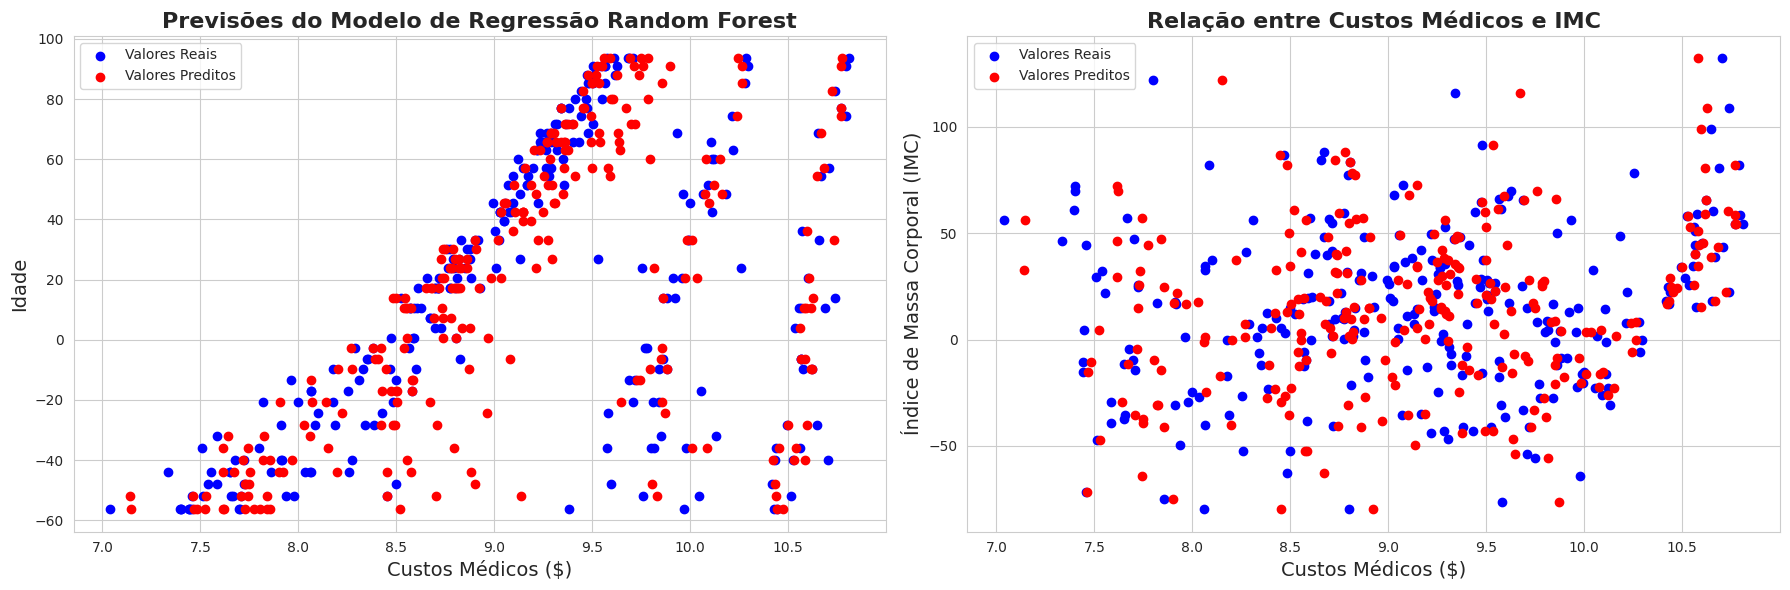

In [ ]:
# Guardar variáveis originais de idade e IMC
idade_min, idade_max = df['age'].min(), df['age'].max()
bmi_min, bmi_max = df['bmi'].min(), df['bmi'].max()

# Desnormalizando a idade e IMC
x_test_age_real = x_test["age"] * (idade_max - idade_min) + idade_min
x_test_bmi_real = x_test["bmi"] * (bmi_max - bmi_min) + bmi_min

# Criando uma figura 1 linha e 2 colunas
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Custos Médicos vs Idade
axs[0].scatter(y_test, x_test_age_real, color='blue', label='Valores Reais')
axs[0].scatter(y_pred_final, x_test_age_real, color='red', label='Valores Preditos')
axs[0].set_title('Previsões do Modelo de Regressão Random Forest', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Custos Médicos ($)', fontsize=14)
axs[0].set_ylabel('Idade', fontsize=14)
axs[0].legend()

# Custos Médicos vs IMC
axs[1].scatter(y_test, x_test_bmi_real, color='blue', label='Valores Reais')
axs[1].scatter(y_pred_final, x_test_bmi_real, color='red', label='Valores Preditos')
axs[1].set_title('Relação entre Custos Médicos e IMC', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Custos Médicos ($)', fontsize=14)
axs[1].set_ylabel('Índice de Massa Corporal (IMC)', fontsize=14)
axs[1].legend()

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()

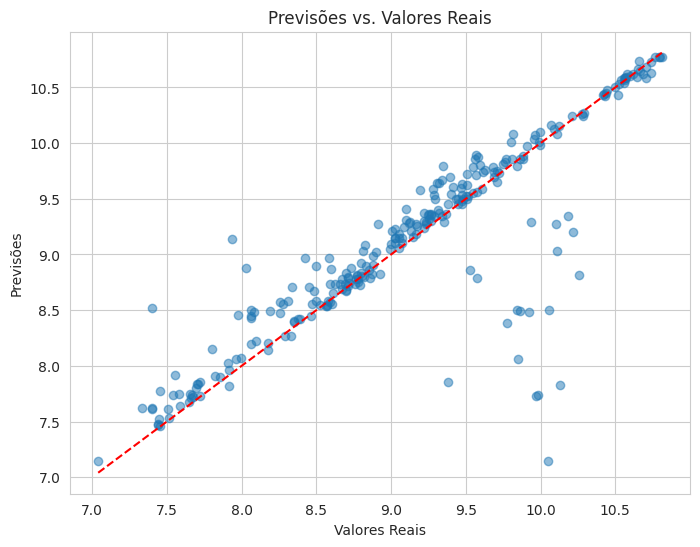

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred_final, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha diagonal para referência
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.grid(True)
plt.show()

#Simulador de Custos

In [ ]:
# Função para previsão do custo do plano de saúde
def predict_health_plan_cost():
    # Solicitar entradas do usuário
    age = int(input("Digite a idade: "))
    bmi = float(input("Digite o IMC (Índice de Massa Corporal): "))
    children = int(input("Digite a quantidade de filhos: "))
    sex = input("Digite o sexo ('male' ou 'female'): ").strip().lower()
    smoker = input("É fumante? ('yes' ou 'no'): ").strip().lower()
    region = input("Digite a região ('northeast', 'northwest', 'southeast', 'southwest'): ").strip().lower()

    # Codificar as entradas categóricas
    sex_encoded = label_encoders['sex'].transform([sex])[0]
    smoker_encoded = label_encoders['smoker'].transform([smoker])[0]
    region_encoded = label_encoders['region'].transform([region])[0]

    # Criar o DataFrame de entrada com as mesmas colunas de x_train
    input_data = pd.DataFrame([{
        'age': age,
        'bmi': bmi,
        'children': children,
        'sex': sex_encoded,
        'smoker': smoker_encoded,
        'region': region_encoded
    }], columns=x_train.columns)  # Garantir que as colunas estão na mesma ordem

    # Escalonar os dados de entrada
    input_data_scaled = pd.DataFrame(scaler.transform(input_data), columns=input_data.columns)

    # Fazer a previsão
    prediction = model.predict(input_data_scaled)[0]
    return f"O custo previsto do plano de saúde é: ${prediction:.2f}"

# Chamar a função para permitir entrada do usuário
resultado = predict_health_plan_cost()
print(resultado)

Digite a idade: 37
Digite o IMC (Índice de Massa Corporal): 25
Digite a quantidade de filhos: 0
Digite o sexo ('male' ou 'female'): yes


In [ ]:
df.sample(10)

#Teste

In [ ]:
# Codificar variáveis categóricas
df_encoded = df.copy()
label_encoders = {}

for column in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# Aplicar PowerTransformer para normalizar variáveis contínuas
pt = PowerTransformer()
df_encoded[['age', 'bmi', 'children']] = pt.fit_transform(df_encoded[['age', 'bmi', 'children']])

In [ ]:
# Adicionar features polinomiais
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_encoded.drop('charges', axis=1))
poly_feature_names = poly.get_feature_names_out(df_encoded.drop('charges', axis=1).columns)

In [ ]:
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

In [ ]:
# Separar variáveis independentes (x) e dependente (y)
x = df_poly
y = np.log1p(df_encoded['charges'])  # Transformação logarítmica para lidar com valores extremos

In [ ]:
# Separar variáveis independentes (x) e dependente (y)
x = df_encoded.drop('charges', axis=1)
y = np.log1p(df_encoded['charges'])  # Transformação logarítmica para lidar com valores extremos

In [ ]:
# Separar variáveis independentes (x) e dependente (y)
x = df_poly
y = df_encoded['charges']

In [ ]:
# Separar variáveis independentes (X) e dependente (y)
x = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [ ]:
# Selecionar as melhores features
selector = SelectKBest(score_func=f_regression, k=10)
x_selected = selector.fit_transform(x, y)
selected_features = selector.get_feature_names_out()
x = pd.DataFrame(x_selected, columns=selected_features)

In [ ]:
# Escalonar `y`
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(np.array(y).reshape(-1, 1))

In [ ]:
# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y_scaled, test_size=0.2, random_state=42)

In [ ]:
# Escalonar os dados
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Inicializar o modelo Random Forest com hiperparâmetros otimizados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

In [ ]:
# Avaliar o modelo final
y_pred = best_model.predict(x_test)
#y_test_exp = np.expm1(y_test)  # Reverter a transformação logarítmica
#y_pred_exp = np.expm1(y_pred)  # Reverter a transformação logarítmica

#mae = mean_absolute_error(y_test_exp, y_pred_exp)
#mse = mean_squared_error(y_test_exp, y_pred_exp)
#r2 = r2_score(y_test_exp, y_pred_exp)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

In [ ]:
# Avaliar o modelo final
y_pred = best_model.predict(x_test)
y_test_exp = np.expm1(y_test)  # Reverter a transformação logarítmica
y_pred_exp = np.expm1(y_pred)  # Reverter a transformação logarítmica

mae = mean_absolute_error(y_test_exp, y_pred_exp)
mse = mean_squared_error(y_test_exp, y_pred_exp)
r2 = r2_score(y_test_exp, y_pred_exp)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

In [ ]:
# Inicializar modelos
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "KNeighborsRegressor": KNeighborsRegressor()
}

In [ ]:
# Avaliar modelos
results = {}

for model_name, model in models.items():
    if model_name == "KNeighborsRegressor":
        model.fit(x_train_scaled, y_train)
        predictions = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[model_name] = {"MAE": mae, "MSE": mse, "R²": r2}

# Exibir os resultados
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R²", ascending=False)

In [ ]:
# Avaliar modelos
results = {}

for model_name, model in models.items():
    if model_name == "KNeighborsRegressor":
        model.fit(x_train_scaled, y_train)
        predictions = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)

    y_test_exp = np.expm1(y_test)  # Reverter a transformação logarítmica
    y_pred_exp = np.expm1(predictions)  # Reverter a transformação logarítmica
    mae = mean_absolute_error(y_test_exp, y_pred_exp)
    mse = mean_squared_error(y_test_exp, y_pred_exp)
    r2 = r2_score(y_test_exp, y_pred_exp)
    results[model_name] = {"MAE": mae, "MSE": mse, "R²": r2}

# Exibir os resultados
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R²", ascending=False)

In [ ]:
# Avaliar modelos e reverter a normalização para métricas reais
results = {}

for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    predictions = model.predict(x_test_scaled)
    # Reverter a normalização das previsões
    predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()
    y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

    mae = mean_absolute_error(y_test_rescaled, predictions)
    mse = mean_squared_error(y_test_rescaled, predictions)
    r2 = r2_score(y_test_rescaled, predictions)
    results[model_name] = {"MAE": mae, "MSE": mse, "R²": r2}

# Exibir os resultados
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R²", ascending=False)

In [ ]:
# Validação cruzada
cv_scores = cross_val_score(best_model, x_train_scaled, y_train, cv=5, scoring='r2')
print(f"Validação Cruzada - R² Médio: {np.mean(cv_scores):.4f}")